In [148]:
from one import model
from one import algorithm
from one import method
import one as mcsp

In [2]:
import uuid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.tsa.stattools as ts
import scipy.stats as scs
from tqdm import tqdm, trange
import copy
from typing import List, Dict, Tuple, Any, Union, Optional

# 设定全局随机种子
random.seed(0)

In [9]:
import networkx as nx

# scipy comb
from scipy.special import comb

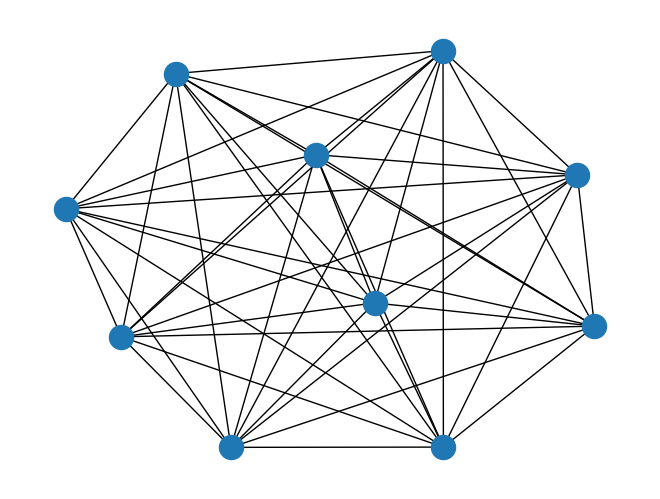

In [67]:
G = nx.erdos_renyi_graph(10, 1)
nx.draw(G, label=True)

In [185]:
# -*- encoding: utf-8 -*-
"""
@File    :   Ising.py
@Time    :   2023/05/31 11:47:09
@Author  :   UynajGI
@Contact :   suquan12148@outlook.com
@License :   (MIT)Copyright 2023
"""

# here put the import lib
from typing import Any, Tuple
import numpy as np
import copy
import pandas as pd
import networkx as nx

__all__ = ["Staurss"]


class Staurss(object):

    def __init__(self,
                 L: int,
                 Jij: float = 1,
                 H: float = 0,
                 *args: Any,
                 **kwargs: Any):
        L = int(L)
        self.L = L
        self.dim = 2
        self.N = L
        self.Jij = Jij
        self.H = H
        self._init_spin(type="staurss")
        self._get_total_energy()
        self._get_total_density()

    def __len__(self):
        return self.L

    def __getitem__(self, index: Tuple[int, ...]):
        return self.spin[index]

    def _init_spin(self, type="staurss", *args, **kwargs):
        """Initialize the spin of the system

        Args:
            type (str, optional): The type of the spin / cn: 自旋的类型 (Defaults \'ising\')
        """
        self.spin = nx.erdos_renyi_graph(self.L, np.random.rand())
        self.type = type

    def _get_per_energy(self) -> float:
        """Get the per energy of the system / cn: 获取系统的单位能量

        Returns:
            float: The per energy of the system / cn: 系统的单位能量
        """
        return self.energy / self.N

    def _get_total_triangle(self) -> int:
        return np.sum([nx.triangles(self.spin, n)
                       for n in self.spin.nodes()]) / 3

    def _get_total_energy(self) -> float:
        """Get the total energy of the system / cn: 获取系统的总能量

        Returns:
            float: The total energy of the system / cn: 系统的总能量
        """
        energy = self.Jij * self._get_total_triangle(
        ) / self.N - self.H * self.spin.number_of_edges()

        self.energy = energy
        return energy

    def _get_total_density(self):
        self.density = self.spin.number_of_edges()
        return self.spin.number_of_edges()

    def _change_site_spin(self, index: Tuple[int, ...]):
        """Change the spin of the site / cn: 改变格点的自旋

        Args:
            index (Tuple[int, ...]): The index of the site / cn: 格点的坐标

        Raises:
            ValueError: Invalid type of spin / cn: 无效的自旋类型
        """
        i, j = index
        if self.spin.has_edge(i, j):
            self.spin.remove_edge(i, j)
        else:
            self.spin.add_edge(i, j)

    def _change_delta_energy(self, index: Tuple[int, ...]):
        """Get the delta energy of the site"""
        old_energy = copy.deepcopy(self.energy)
        self._change_site_spin(index)
        new_energy = copy.deepcopy(self._get_total_energy())
        self._get_total_density()
        detle_energy = new_energy - old_energy
        self.energy += detle_energy
        return detle_energy

    def set_spin(self, spin):
        self.spin = spin
        self._get_total_energy()
        self._get_total_density()

    def get_energy(self) -> float:
        return self.energy

    def get_density(self) -> float:
        return self.density

    def _init_data(self):
        data: pd.DataFrame = pd.DataFrame(
            columns=["uid", "iter", "T", "H", "energy", "density", "spin"])
        data.set_index(["uid", "iter"], inplace=True)
        return data

    def _save_date(self, T, uid, data: pd.DataFrame):
        if uid not in data.index.get_level_values("uid").values:
            data.loc[(uid, 1), :] = [T, self.H, self.energy, self.density, 0]
            data.at[(uid, 1), "spin"] = copy.deepcopy(self.spin)
        else:
            iterplus = data.loc[uid].index.max() + 1
            data.loc[(uid, iterplus), :] = [
                T, self.H, self.energy, self.density, 0
            ]
            data.at[(uid, iterplus), "spin"] = copy.deepcopy(self.spin)
        return data

In [186]:
m = Staurss(40, H=0.239)
f = mcsp.Metropolis(m)

In [187]:
uid_dic = f.param_sample((0.296,0.32,3),'T',0.239,max_iter=1000)

100%|██████████| 3/3 [00:57<00:00, 19.23s/it]


In [189]:
uid_dic

{'uid': ['73e7d70b043a11ee81d300e04c6807cc',
  '7ee65729043a11eeb1db00e04c6807cc',
  '8a8ad5a1043a11eeb18500e04c6807cc'],
 'T': array([0.296, 0.308, 0.32 ])}

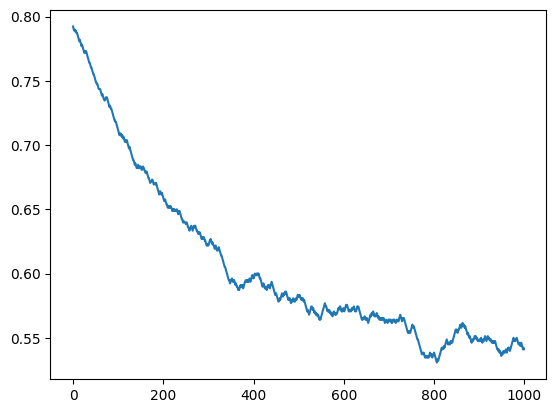

In [193]:
plt.plot(np.array(f.data.loc['73e7d70b043a11ee81d300e04c6807cc']['density'].tolist())/comb(40,2))